In [1]:
import pandas as pd
from collections import defaultdict
import pickle
import gzip
import numpy as np
from collections import defaultdict

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
feat_matrices = defaultdict(list)
for dataset in ['yeast','woman']:
    pdist_matrix_squared = pd.read_csv("../dataset/%s_featspace_pdist.csv" % dataset, header=None).values
    feat_matrices[dataset]=pdist_matrix_squared

In [4]:
columns_ylist = {'woman': 'service', 'yeast': 'Class'}

Per ogni istanza da spiegare seleziono i primi k vicini e ne calcolo la "dispersione" attorno al valore medio:
$$\frac{1}{k}\sum_{i=1}^k|\vec{v}_i-\bar{v}|^2$$

In [102]:
def neigh_sse(dataset):
    df_2e = pd.read_csv('../dataset/%s_2e.csv' % dataset)
    cols_Y = [col for col in df_2e.columns if col.startswith(columns_ylist[dataset])]
    cols_X = [col for col in df_2e.columns if col not in cols_Y]
    X2E = df_2e[cols_X]
    k=int(0.5*np.sqrt(len(X2E)))
    
    sse_list = []
    for instance in X2E.index.values:
        sampleKnn_feat_space = X2E.loc[pd.DataFrame(feat_matrices[dataset]).loc[instance].sort_values().index.values[0:k]]
        #norm_sampleKnn_feat_space = sampleKnn_feat_space.div(np.linalg.norm(sampleKnn_feat_space, axis=1), axis='index')
        #mean_squared_dist = sum(np.linalg.norm(norm_sampleKnn_feat_space - norm_sampleKnn_feat_space.mean(),axis=1)**2)/len(norm_sampleKnn_feat_space)
        mean_squared_dist = sum(np.linalg.norm(sampleKnn_feat_space - sampleKnn_feat_space.mean(),axis=1)**2)/len(sampleKnn_feat_space)
        
        sse_list.append(mean_squared_dist)
    return sse_list

In [103]:
yeast_sse_list = neigh_sse('yeast')

In [104]:
woman_sse_list = neigh_sse('woman')

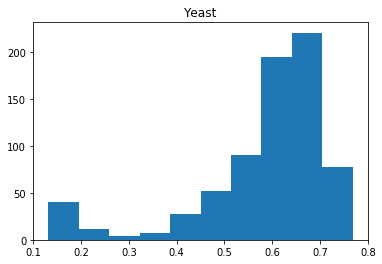

In [105]:
hist(yeast_sse_list)
title('Yeast')
show()

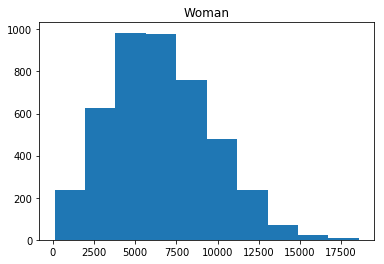

In [106]:
hist(woman_sse_list)
title('Woman')
show()